## Test level 2

### Test level 3

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [1]:
import pandas as pd 
import xarray as xr

## Damages by model

### FUND model

The FUND model represents many damages. 

In [11]:
ds = xr.load_dataset('../../../results/results_run_2060.nc')
ds.keys()
#ds.close()

KeysView(<xarray.Dataset> Size: 1MB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            VINTAGING ANNUAL: 10,
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                 

In [14]:
ds.coords

Coordinates:
  * A MATRIX YEARS I                                         (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                    (AEZ I) <U13 208B ...
  * AGE ADULTS I                                             (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                              (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                       (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                        (AGE CHAIN YOUNG I) <U6 360B ...
  * AGE CHILDREN I                                           (AGE CHILDREN I) <U6 72B ...
  * AGE COHORTS I                                            (AGE COHORTS I) <U7 476B ...
  * AGE EDUCATION I                                          (AGE EDUCATION I) <U6 192B ...
  * AGE RETIREMENT I                                         (AGE RETIREMENT I) <U7 112B ...
  * AGE WORKING I                                            (AGE WORKING I) <U7

In [31]:
def load_variable_data_from_ds(variable, dataset_name='results_run_2060.nc'):
    """
    Load variable data from a NetCDF dataset.

    Parameters:
    variable (str): The name of the variable to load.

    Returns:
    pandas.DataFrame: The loaded variable data as a DataFrame.
    """

    ds = xr.open_dataset(f'../../../results/{dataset_name}')
    data = ds[variable].to_dataframe().reset_index()
    ds.close()

    return data


In [41]:
agriculture.columns[2]

'fund_a2_agricultural_impact_of_the_rate_of_climate_change'

In [42]:
def map_variable(data, year):

    import geopandas as gpd
    import matplotlib.pyplot as plt

    variable = data.columns[2]

    map = gpd.read_file('../../../WILIAM_v1.3/geography/output_countries/countries.shp')    
    data_map = data[data['time'] == year]

    map_phenomenon = map.merge(data_map, left_on='Region_WIL', right_on='REGIONS 35 I', how='left')


    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    map.plot(ax=ax, color='white', edgecolor='lightgray')
    map_phenomenon.plot(ax=ax, 
                        column=variable, 
                        legend=True, 
                        legend_kwds={'label': "FUND", 
                                    'orientation': "horizontal"})

    # Set the title and axis labels
    ax.set_title(f'European Union Map of {variable} in {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Define the bounding box coordinates for continental European Union
    x_min = -15
    x_max = 40
    y_min = 30
    y_max = 70

    # Set the x and y limits of the plot
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Show the plot
    plt.show()

#### Monetary lossses

##### Agriculture

In [21]:
# Multiply the fraction of output by the valuation of the agricultural production 

agriculture = load_variable_data_from_ds("fund_a2_agricultural_impact_of_the_rate_of_climate_change")
agriculture

,time,REGIONS 35 I,fund_a2_agricultural_impact_of_the_rate_of_climate_change
0,2005.0,AUSTRIA,-26.416754
1,2005.0,BELGIUM,-18.788371
2,2005.0,BULGARIA,0.000000
3,2005.0,CROATIA,0.000000
4,2005.0,CYPRUS,-17.404359
...,...,...,...
1955,2060.0,INDIA,0.000000
1956,2060.0,LATAM,0.000000
1957,2060.0,RUSSIA,0.000000
1958,2060.0,USMCA,0.000000


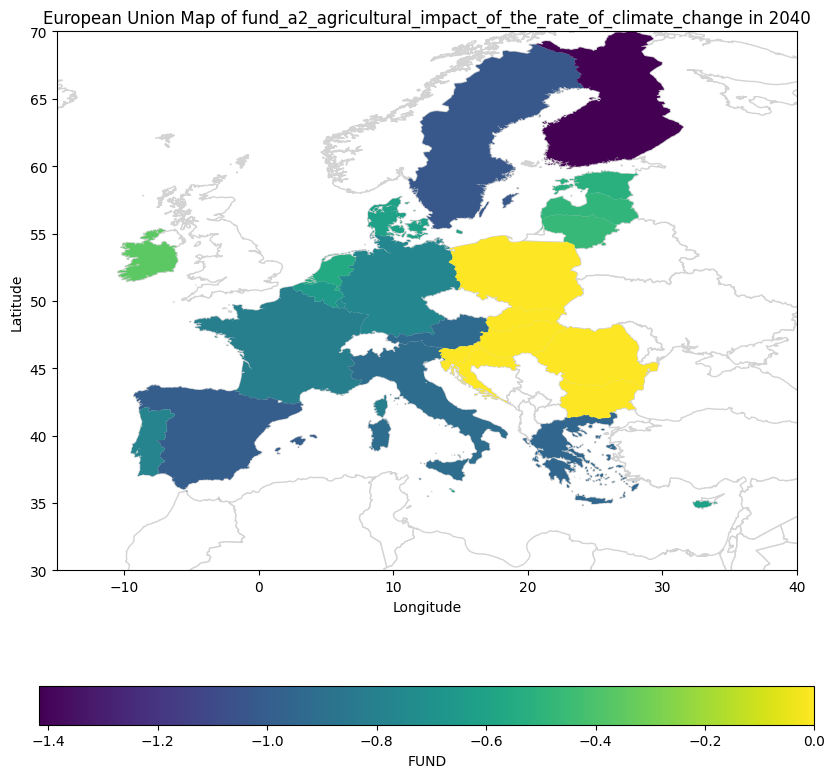

In [43]:
map_variable(agriculture, 2040)

##### Direct monetary impacts 

##### Forestry impact



In [28]:
forestry = load_variable_data_from_ds("fund_f1_forestry_change_in_consumer_and_producer_surplus")
forestry

,time,REGIONS 35 I,fund_f1_forestry_change_in_consumer_and_producer_surplus
0,2005.0,AUSTRIA,NaN
1,2005.0,BELGIUM,0.000013
2,2005.0,BULGARIA,0.000000
3,2005.0,CROATIA,0.000000
4,2005.0,CYPRUS,0.000012
...,...,...,...
1955,2060.0,INDIA,0.000000
1956,2060.0,LATAM,0.000000
1957,2060.0,RUSSIA,0.000000
1958,2060.0,USMCA,0.000000


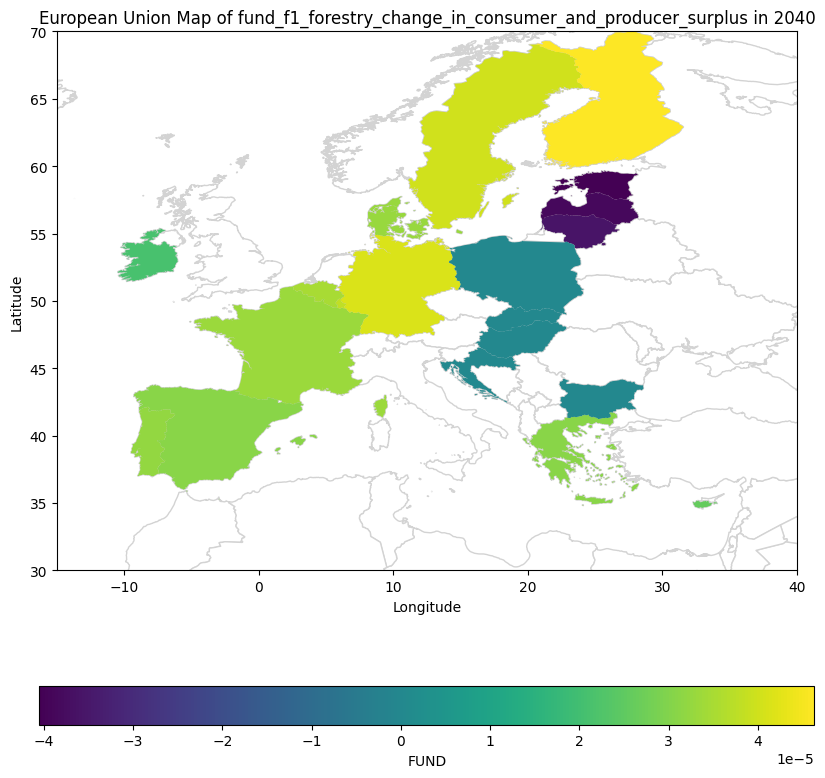

In [45]:
map_variable(forestry, 2040)

##### Water ressources impact

In [29]:
water = load_variable_data_from_ds("fund_w1_change_in_water_resources")
water

,time,REGIONS 35 I,fund_w1_change_in_water_resources
0,2005.0,AUSTRIA,NaN
1,2005.0,BELGIUM,-105.899594
2,2005.0,BULGARIA,0.000000
3,2005.0,CROATIA,0.000000
4,2005.0,CYPRUS,-4.506037
...,...,...,...
1955,2060.0,INDIA,0.000000
1956,2060.0,LATAM,0.000000
1957,2060.0,RUSSIA,0.000000
1958,2060.0,USMCA,0.000000


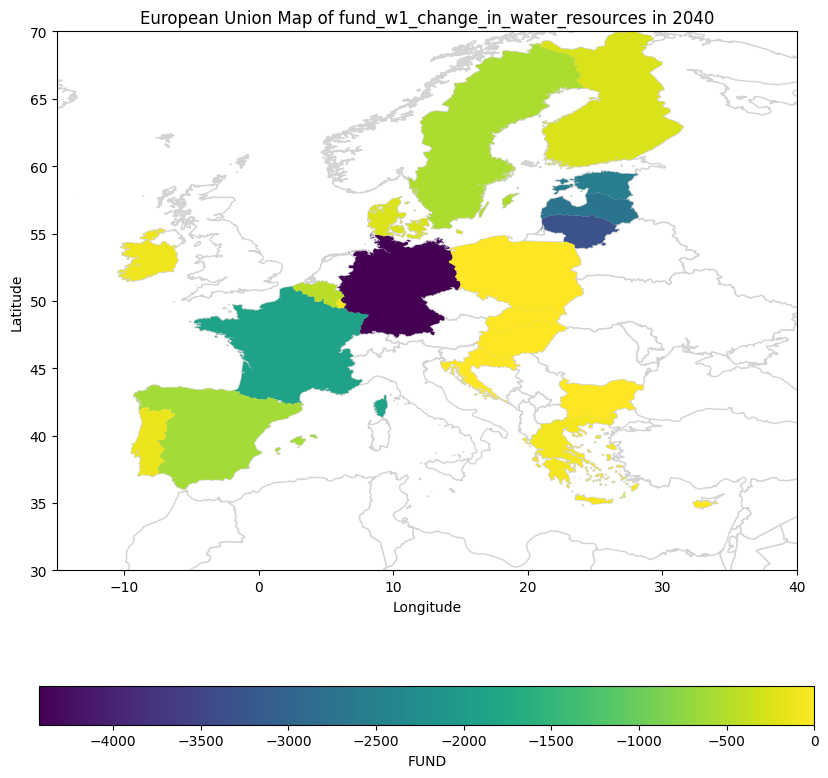

In [46]:
map_variable(water, 2040)

In [30]:
forestryAndWater = forestry + water
forestryAndWater

,REGIONS 35 I,fund_f1_forestry_change_in_consumer_and_producer_surplus,fund_w1_change_in_water_resources,time
0,AUSTRIAAUSTRIA,NaN,NaN,4010.0
1,BELGIUMBELGIUM,NaN,NaN,4010.0
2,BULGARIABULGARIA,NaN,NaN,4010.0
3,CROATIACROATIA,NaN,NaN,4010.0
4,CYPRUSCYPRUS,NaN,NaN,4010.0
...,...,...,...,...
1955,INDIAINDIA,NaN,NaN,4120.0
1956,LATAMLATAM,NaN,NaN,4120.0
1957,RUSSIARUSSIA,NaN,NaN,4120.0
1958,USMCAUSMCA,NaN,NaN,4120.0


##### Energy consumptoin impact

#### Material losses

##### Sea level rise and the loss of land

##### Ecosystems loss

#### Human health impact

##### Diarrhoea

##### Vector-borne diseases

##### Cardiovascular and respiratory mortality

#### Extreme weather

##### Tropical storm

##### Extra-tropical storm

#### Mortality

### Total impact

In [49]:
monetary = load_variable_data_from_ds("fund_tot_eq_moneraty_impact", 'results_run_2030.nc')
monetary

,time,REGIONS 35 I,fund_tot_eq_moneraty_impact
0,2005.0,AUSTRIA,NaN
1,2005.0,BELGIUM,1.379671e+09
2,2005.0,BULGARIA,2.799410e+08
3,2005.0,CROATIA,2.565073e+08
4,2005.0,CYPRUS,9.993271e+07
...,...,...,...
905,2030.0,INDIA,1.654518e+10
906,2030.0,LATAM,2.573583e+10
907,2030.0,RUSSIA,1.355983e+10
908,2030.0,USMCA,9.004928e+10


<Axes: xlabel='time', ylabel='fund_tot_eq_moneraty_impact'>

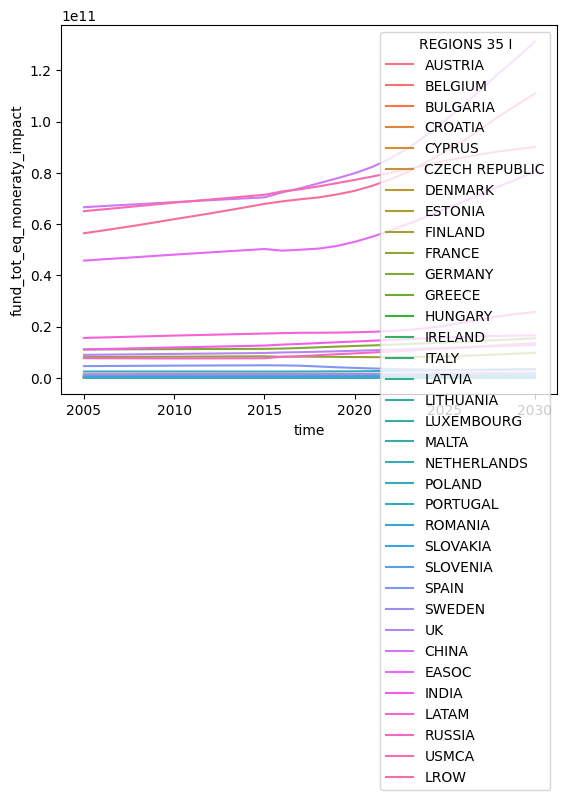

In [61]:
import seaborn as sns
sns.lineplot(data=monetary, 
             x='time', 
             y= 'fund_tot_eq_moneraty_impact',
             hue = 'REGIONS 35 I')

<Axes: xlabel='time', ylabel='fund_tot_eq_moneraty_impact'>

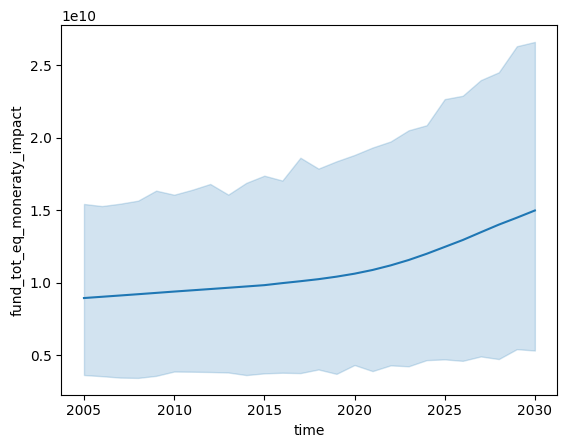

In [56]:
monetary_global = monetary.groupby(['time', 'REGIONS 35 I']).sum()

sns.lineplot(
    data=monetary_global, 
    x = 'time', 
    y = 'fund_tot_eq_moneraty_impact'
)

In [59]:
monetary_global= monetary.groupby(['time', 'REGIONS 35 I']).sum().reset_index()
monetary_global

,time,REGIONS 35 I,fund_tot_eq_moneraty_impact
0,2005.0,AUSTRIA,0.000000e+00
1,2005.0,BELGIUM,1.379671e+09
2,2005.0,BULGARIA,2.799410e+08
3,2005.0,CHINA,6.656528e+10
4,2005.0,CROATIA,2.565073e+08
...,...,...,...
905,2030.0,SLOVENIA,0.000000e+00
906,2030.0,SPAIN,3.196550e+09
907,2030.0,SWEDEN,1.713529e+09
908,2030.0,UK,1.282117e+10


### Mortality

In [63]:
mortality = load_variable_data_from_ds("fund_tot_eq_total_deaths", 'results_run_2030.nc')

<Axes: xlabel='time', ylabel='fund_tot_eq_total_deaths'>

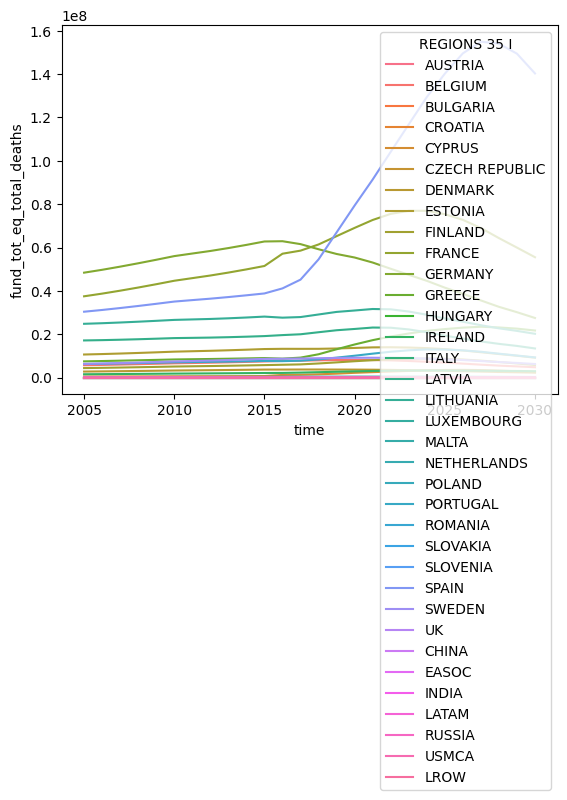

In [65]:
sns.lineplot(data=mortality, 
             x='time', 
             y= 'fund_tot_eq_total_deaths',
             hue = 'REGIONS 35 I')